In [1]:
import Data_acq as data
from models import Encoder
from models import Decoder
from models import cVAE
import importlib

Datos

In [2]:
import importlib
importlib.reload(data)
x_train, x_test,x_val ,y_train, y_test,y_val = data.get_mnist_data()

print("="*70)
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"x_val: {x_val.shape}\n")
print("-"*70)
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"y_val: {y_val.shape}\n")
print("primer elemento")
print(f"primer elemento del set de entrenamineto shape: {x_train[0].shape}\n")
print(f"primer elemento del set de entrenamineto: {x_train[0]}")

print(f"primer label del set de entrenamineto shape: {y_train[0].shape}\n")
print(f"primer label del set de entrenamineto: {y_train[0]}")

print("="*70)


x_train: (55000, 28, 28)
x_test: (10000, 28, 28)
x_val: (5000, 28, 28)

----------------------------------------------------------------------
y_train: (55000, 10)
y_test: (10000, 10)
y_val: (5000, 10)

primer elemento
primer elemento del set de entrenamineto shape: (28, 28)

primer elemento del set de entrenamineto: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0

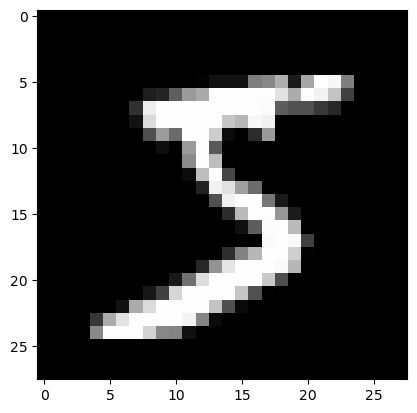

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")
plt.show()

Enconder


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[-9.76264775e-02  2.36916721e-01 -3.59384835e-01 -2.86945850e-02
  -1.13990791e-01 -1.14611484e-01 -2.06374794e-01  2.61369407e-01
  -7.09857196e-02 -1.56638771e-01 -3.29575956e-01 -3.16143543e-01
  -5.68685532e-02 -3.34114254e-01 -2.79530212e-02  1.60329282e-01
  -1.74485832e-01 -2.98723578e-01  2.82876581e-01  1.61752850e-01
   5.88463247e-02  5.77768683e-01 -1.03534564e-01 -1.66411132e-01
  -3.60755086e-01 -1.12996936e-01  2.66222134e-02  9.94141027e-03
   2.69018829e-01  3.76982093e-01  3.14063430e-01  2.03199282e-01
  -5.07313848e-01 -1.87851489e-04 -5.64549148e-01 -5.60339451e-01
   9.36481804e-02  3.47428024e-02  1.64644927e-01  1.47829831e-01
  -7.93497860e-02 -1.07179098e-01 -1.44162804e-01 -2.52223492e-01
   3.27965200e-01 -1.23989895e-01 -1.95154399e-01  5.39398074e-01
  -3.30930322e-01 -1.14587285e-01 -2.29094893e-01  2.19253838e-01
  -1.99483156e-01 -1.79315507e-01  7.34643638e-02  3.57187390e-0

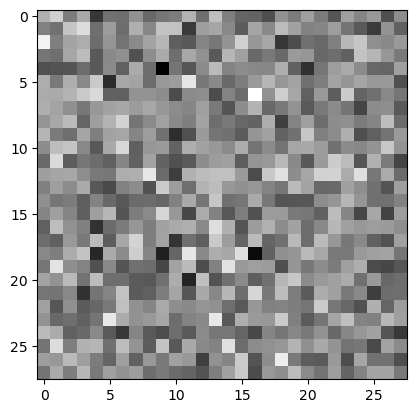

In [4]:
import importlib
import numpy as np
importlib.reload(Encoder)
importlib.reload(Decoder)

#img_dim=(28,28),condition_dim=(10,),intermediate_dim=128,latent_dim=2
#latent_dim=2, cond_dim=(10,), intermediate_dim=128, original_shape=(28, 28)

en = Encoder.build_enconder(intermediate_dim=512,latent_dim=256)
de = Decoder.build_decoder(intermediate_dim=512,latent_dim=256)


img_sample = np.expand_dims(x_train[0], axis=0)  # shape (1, 28, 28)
cond_sample = np.expand_dims(y_train[0], axis=0) 

[z, z_mean, z_log_var] = en.predict([img_sample,cond_sample])

img_recons = de.predict([z,cond_sample])

print(z)
print(z_mean)
print(z_log_var)
print(img_recons[0].shape)

plt.imshow(img_recons[0],cmap="gray")
plt.show()


In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

importlib.reload(cVAE)
original_dim = 28*28
beta = 1.0

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(128)




cvae = cVAE.CVAE(encoder=en, decoder=de, original_dim=original_dim, beta=1.0)
cvae.compile(optimizer=tf.keras.optimizers.Adam())

cvae.fit(train_dataset,
        epochs=5,
        batch_size=128,
        #validation_data=val_dataset,
        #callbacks=[early_stopping]
         )

Epoch 1/5


In [ ]:
cvae.fit(train_dataset, epochs=5,batch_size=128)

NameError: name 'dataset' is not defined

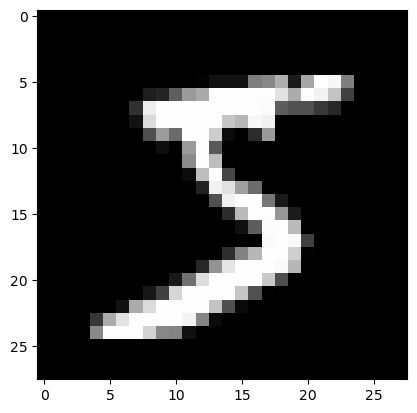

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
(1, 28, 28)


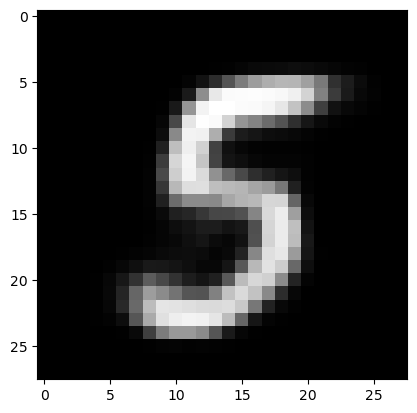

In [ ]:
x_input = x_train[:1]         # 1 imagen (shape: (1, 28, 28))
cond_input = y_train[:1]      # su condición (shape: (1, 10))

plt.imshow(x_input[0],cmap="gray")
plt.show()

z_mean, z_log_var, z = cvae.encoder.predict([x_input, cond_input])

# Paso por el decoder para reconstrucción
reconstructed = cvae.decoder.predict([z, cond_input])
print(reconstructed.shape)
plt.imshow(reconstructed[0],cmap="gray")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualizar_condiciones(cvae, x_input):
    """
    Muestra cómo se reconstruye una imagen de entrada bajo las 10 condiciones posibles (0 a 9).
    """
    assert x_input.shape == (28, 28) or x_input.shape == (1, 28, 28), "x_input debe tener forma (28,28) o (1,28,28)"

    # Asegurar que x_input tenga batch dimension
    if x_input.shape == (28, 28):
        x_input = np.expand_dims(x_input, axis=0)

    # Repetir la imagen 10 veces
    x_repeated = np.repeat(x_input, repeats=10, axis=0)  # (10, 28, 28)

    # Crear las 10 condiciones one-hot
    condiciones = np.eye(10)  # (10, 10)

    # Codificar
    z_mean, z_log_var, z = cvae.encoder.predict([x_repeated, condiciones])

    # Reconstruir
    reconstrucciones = cvae.decoder.predict([z, condiciones])

    # Mostrar
    plt.figure(figsize=(15, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(reconstrucciones[i], cmap="gray")
        plt.title(f"Clase {i}")
        plt.axis("off")
    plt.suptitle("Reconstrucciones bajo distintas condiciones")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


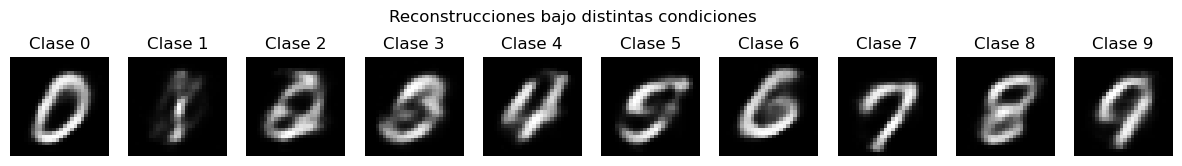

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


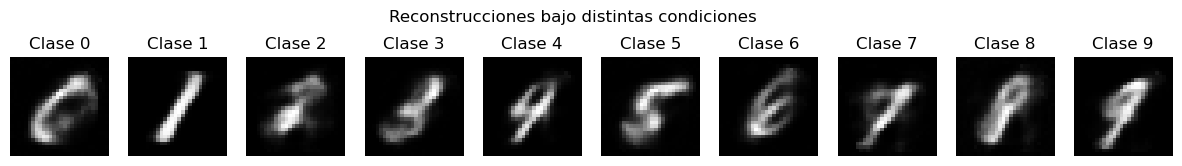

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


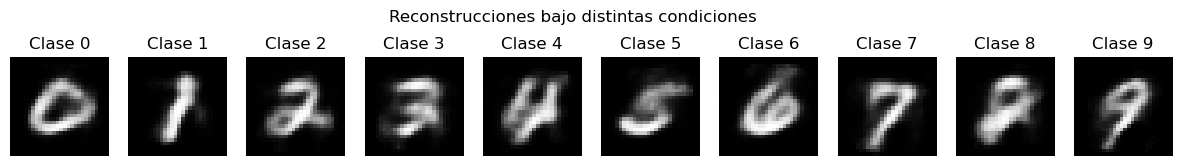

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


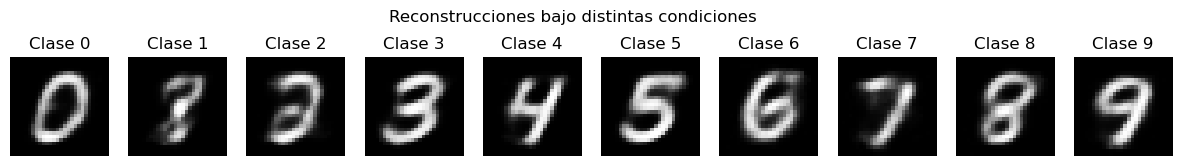

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


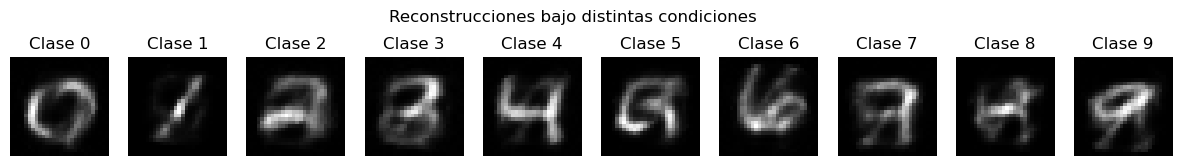

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


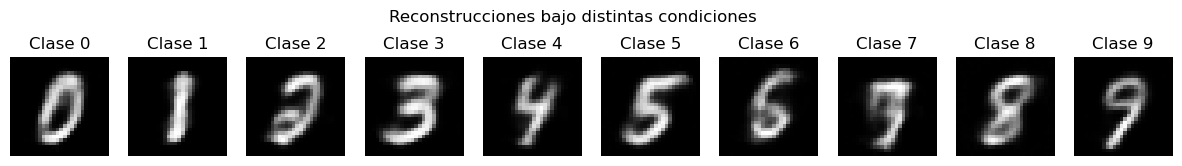

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


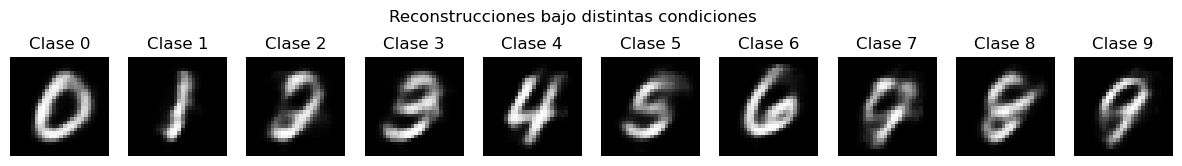

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


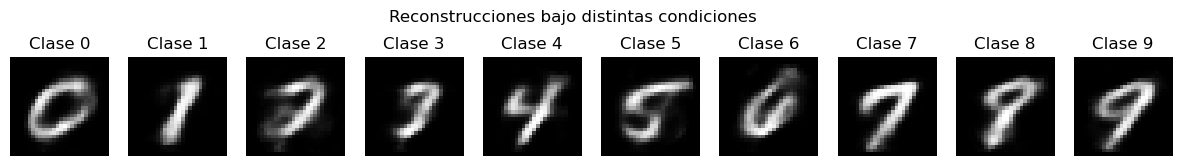

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


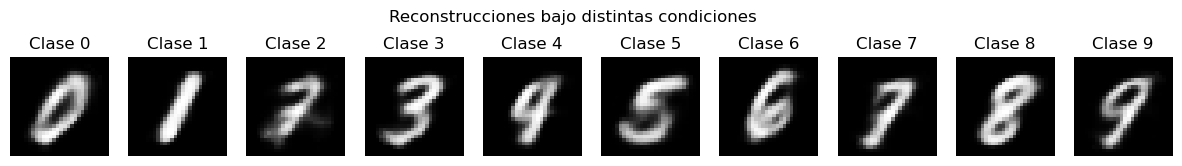

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


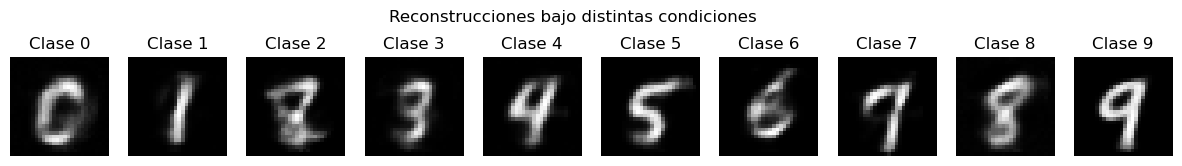

In [ ]:
# Tomá una imagen del conjunto de test
indices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0


for i in indices_de_testeo:

    imagen = x_train[i]  # por ejemplo, la imagen 0
    #plt.imshow(imagen)
    #plt.show()
    # Visualizá cómo se reconstruye con todas las condiciones posibles
    visualizar_condiciones(cvae, imagen)


In [ ]:
def visualizar_variantes(cvae, condicion_id, num_variantes=10):
    """
    Muestra múltiples imágenes generadas para una misma condición.
    
    Args:
        cvae: modelo CVAE entrenado.
        condicion_id: entero de 0 a 9, la clase condicional deseada.
        num_variantes: número de muestras a generar.
    """
    # Comprobar que el ID sea válido
    assert 0 <= condicion_id <= 9, "La condición debe estar entre 0 y 9."

    # Crear condición one-hot repetida
    condicion = np.eye(10)[condicion_id]
    condiciones = np.repeat([condicion], num_variantes, axis=0)  # (num_variantes, 10)

    # Generar z aleatorios ~ N(0,1)
    latent_dim = cvae.decoder.input_shape[0][1]  # obtiene la dimensión latente del input
    z = np.random.normal(size=(num_variantes, latent_dim))  # (num_variantes, latent_dim)

    # Generar imágenes con el decoder
    imgs_generadas = cvae.decoder.predict([z, condiciones])

    # Mostrar
    plt.figure(figsize=(15, 2))
    for i in range(num_variantes):
        plt.subplot(1, num_variantes, i + 1)
        plt.imshow(imgs_generadas[i], cmap="gray")
        plt.axis("off")
    plt.suptitle(f"Variantes generadas para la clase {condicion_id}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


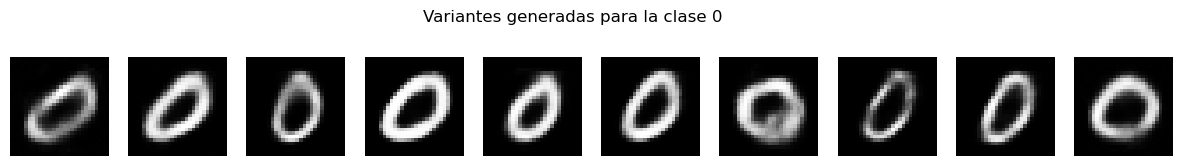

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


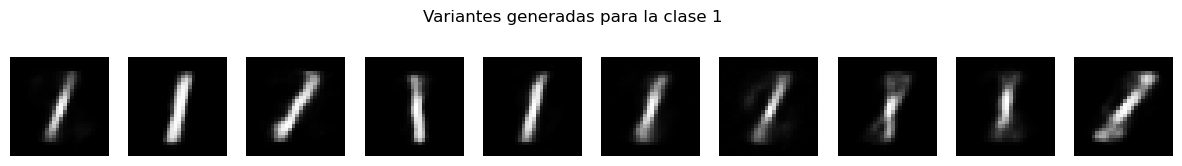

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


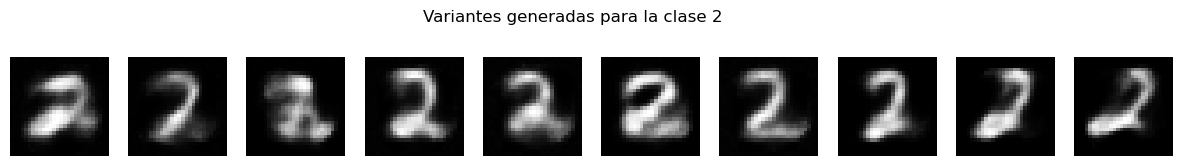

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


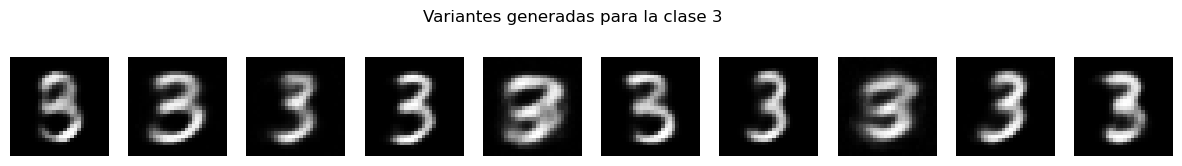

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


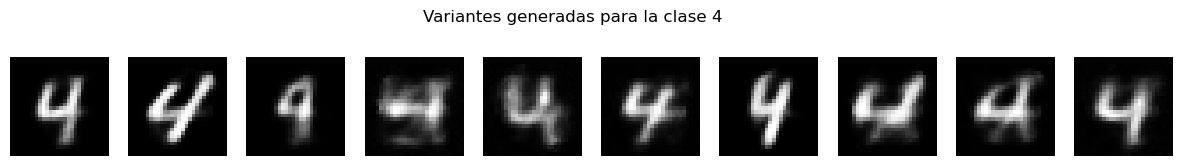

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


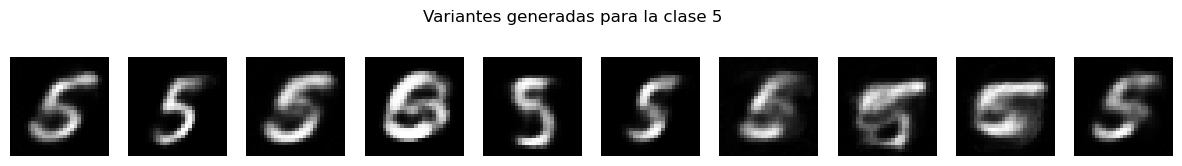

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


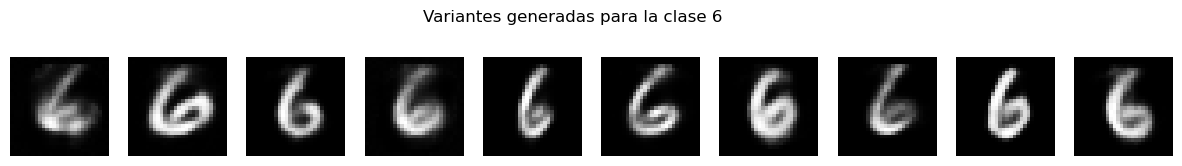

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


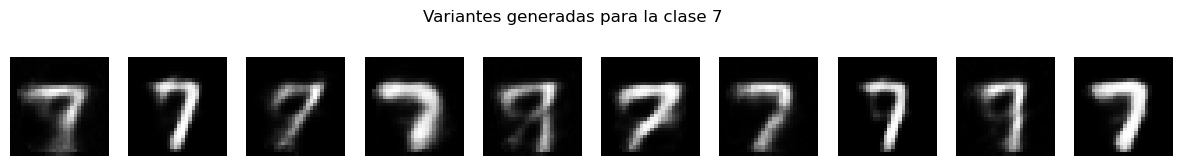

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


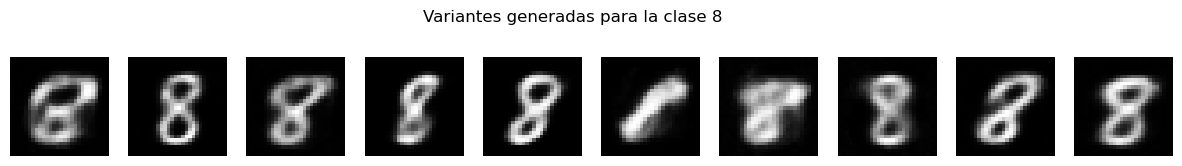

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


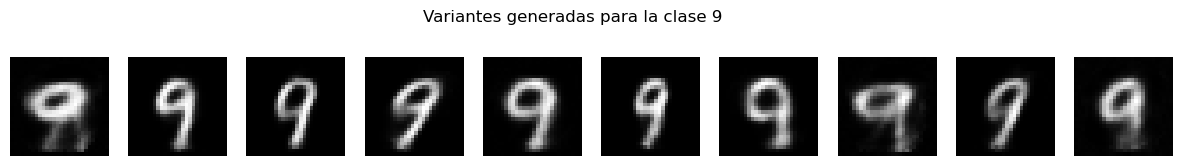

In [ ]:
# Ver 10 variantes generadas para la clase 3
for i in range(10):
    
    visualizar_variantes(cvae, condicion_id=i, num_variantes=10)
